# Comparison of all users with users used for ML approach

In [1]:
# add src to path so the noteboook can import utilities.py
import sys
sys.path.append('C:\\Users\\Johannes Allgaier\\Documents\\tinnitus-country\\src\\d00_utils')

In [2]:
# project location
p_loc = 'C:/Users/Johannes Allgaier/Documents/tinnitus-country/'

In [28]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utilities as u
from scipy.stats import ks_2samp

In [4]:
# read in dfs
df = pd.read_csv(p_loc + 'data/02_intermediate/baseline.csv', index_col = 'Unnamed: 0',
                parse_dates = ['4', '9', 'created_at'],na_values = ['??.??.????', '27.02.2522']
                )

ml = pd.read_csv(p_loc + 'data/03_processed/df_equal_splits.csv')

In [5]:
# get lists of users for ml approach and all users
ml_users = ml.user_id.unique().tolist()
# the index of the baseline questionnaire is the user_id
al_users = df.index.tolist()

In [6]:
# create a new column that indicates whether this user has been used for ml or not
df['used_for_ml'] = df.index.isin(ml_users)
df['used_for_ml'].value_counts()

True     2179
False    1512
Name: used_for_ml, dtype: int64

In [7]:
# rename columns
df.rename(columns = {'4':'date_of_birth','6':'handedness', '7':'family_history', '5':'sex'}, inplace=True)

#### Family history of tinnitus complaints


In [8]:
ct = pd.crosstab(df['used_for_ml'], df['family_history'], normalize = 'index')
history = ct.stack().reset_index().rename(columns={0:'value'})
history

,used_for_ml,family_history,value
0,False,No,0.767622
1,False,Yes,0.232378
2,True,No,0.758653
3,True,Yes,0.241347


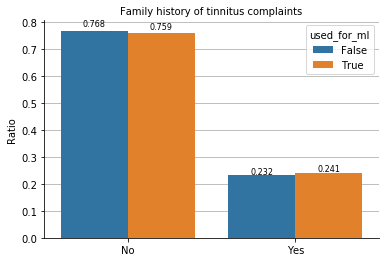

In [9]:
# create plot and add annotations
fig, ax1 = plt.subplots(1,1)

# set grid
ax1.grid(axis = 'y', zorder=0)

# ax1
sns.barplot(x= history['family_history'], y = history.value, hue = history.used_for_ml, ax = ax1, zorder=3)

# remove top and right frame
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# set log scale and labels
ax1.set_xlabel('')
ax1.set_ylabel('Ratio')
ax1.set_title('Family history of tinnitus complaints', fontsize = 10)

# show values on bars
u.show_values_on_bars(ax1, h_v = 'v', space = 1, normalize=True)

For the baseline dataset at hand, 23.2 % of the users report a family history of tinnitus complaints, whereas 76.8% say that they do not have such a hisotry. Subjects that have been selected for the machine learning datset report existing family history complaints with a chance of 24.1 %, which is 0.9 % higher.


#### Handedness

In [10]:
ct = pd.crosstab(df['used_for_ml'], df['handedness'], normalize = 'index')
handedness = ct.stack().reset_index().rename(columns={0:'value'})
handedness

,used_for_ml,handedness,value
0,False,Both Sides,0.185328
1,False,Left,0.137452
2,False,Right,0.677220
3,True,Both Sides,0.128170
4,True,Left,0.115722
5,True,Right,0.756109


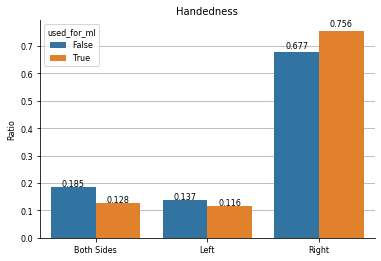

In [11]:
# create plot and add annotations
fig, ax1 = plt.subplots(1,1)

# set grid
ax1.grid(axis = 'y', zorder=0)

# ax1
sns.barplot(x= handedness['handedness'], y = handedness.value, hue = handedness.used_for_ml, ax = ax1, zorder=3)

# remove top and right frame
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# set log scale and labels
ax1.set_xlabel('')
ax1.set_ylabel('Ratio')
ax1.set_title('Handedness', fontsize = 10)

# show values on bars
u.show_values_on_bars(ax1, h_v = 'v', space = 1, normalize=True)

For the baseline questionnaire, 67.7 % are right handed, 13.7 % are left handed and 18.5 % report a both sided handedness. For subjects used for the machine learning approach, 75.6 % rare right handed which leads to smaller ratios for both sides and left handedness with 12.8 % , and 11.5 %, respectively.

#### Age Distribution

In [12]:
age_bins = pd.cut(df['date_of_birth'].dt.year, np.arange(1900, 2030, 10))
ct = pd.crosstab(df['used_for_ml'], age_bins, normalize = 'index')
ages = ct.stack().reset_index().rename(columns={0:'value'})
ages

,used_for_ml,date_of_birth,value
0,False,"(1900, 1910]",0.001634
1,False,"(1910, 1920]",0.000817
2,False,"(1920, 1930]",0.000817
3,False,"(1930, 1940]",0.004902
4,False,"(1940, 1950]",0.056373
5,False,"(1950, 1960]",0.151961
6,False,"(1960, 1970]",0.253268
7,False,"(1970, 1980]",0.224673
8,False,"(1980, 1990]",0.189542
9,False,"(1990, 2000]",0.093954


In [13]:
df['date_of_birth'].dt.year.describe()

count    3403.000000
mean     1971.619747
std        14.890389
min      1901.000000
25%      1961.000000
50%      1970.000000
75%      1982.000000
max      2021.000000
Name: date_of_birth, dtype: float64

In [14]:
df[df['used_for_ml'] == True]['date_of_birth'].dt.year.describe()

count    2179.000000
mean     1971.091326
std        14.632392
min      1930.000000
25%      1961.000000
50%      1969.000000
75%      1981.000000
max      2021.000000
Name: date_of_birth, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

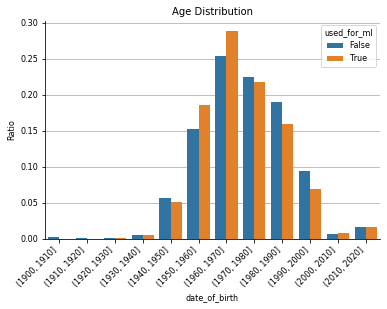

In [15]:
# create plot and add annotations
fig, ax1 = plt.subplots(1,1)

# set grid
ax1.grid(axis = 'y', zorder=0)

# ax1
sns.barplot(x= ages['date_of_birth'], y = ages.value, hue = ages.used_for_ml, ax = ax1, zorder=3)

# remove top and right frame
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# set log scale and labels
xticklabels = ax1.get_xticklabels()
ax1.set_xticklabels(xticklabels, rotation = 45, ha="right")
ax1.set_ylabel('Ratio')
ax1.set_title('Age Distribution', fontsize = 10)




For the both strate the distribution is bell-shaped with a center for people born in the 19060s with a max height of 25 % (all subjects), and 28 % (subjects used for machine learning). For all users, the median year of birth is 1970 with a standard deviation of 14.89 years, a minimum of 1901 and a maximum of 2021 which is a range of 120 years. For subjects used for machine learning, the median year of birth is 1969 with a standard deviation of 14.63, a minimum of 1930 and a maximum of 2021 which is a range of 91 years.

In [30]:
# Compute the Kolmogorov-Smirnov statistic on 2 samples
all_ages = df.date_of_birth.dt.year.values
ml_ages = df[df.used_for_ml == True].date_of_birth.dt.year.values

statistic, pvalue = ks_2samp(all_ages, ml_ages) 
print(statistic, pvalue)

0.07866212407318 7.975835170093148e-08


The small pvalue below 1 % indicates that the two samples are *not* drawn from the same distribution.

#### Gender Distribution

In [16]:
ct = pd.crosstab(df['used_for_ml'], df['sex'], normalize = 'index')
gndr = ct.stack().reset_index().rename(columns={0:'value'})
gndr

,used_for_ml,sex,value
0,False,Female,0.278549
1,False,Male,0.721451
2,True,Female,0.359187
3,True,Male,0.640813


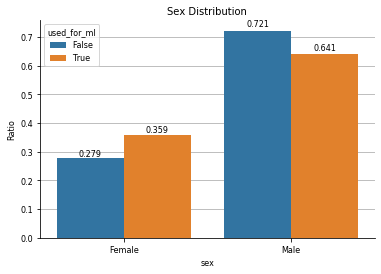

In [22]:
# create plot and add annotations
fig, ax1 = plt.subplots(1,1)

# set grid
ax1.grid(axis = 'y', zorder=0)

# ax1
sns.barplot(x= gndr['sex'], y = gndr.value, hue = gndr.used_for_ml, ax = ax1, zorder=3)

# remove top and right frame
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# set log scale and labels
xticklabels = ax1.get_xticklabels()
ax1.set_xticklabels(xticklabels, rotation = 0, ha="center")
ax1.set_ylabel('Ratio')
ax1.set_title('Sex Distribution', fontsize = 10)

# show values on bars
u.show_values_on_bars(ax1, h_v = 'v', space = 1, normalize=True)


For all subjects, the ratio of male to female is 72.1 to 27.9. That is, there are 72.1 % men and 27.9 % women in the datset. For subjects used for the machine learning approach, there are 8 % points less men and more women which leads to a ratio of 64.1 to 35.9.